In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))  # add project root
import pandas as pd
import numpy as np
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

df= pd.read_csv("../data/clean/team-cleaned_data.csv")



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15232 entries, 0 to 15231
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   build_year          6226 non-null   object 
 1   facades             10088 non-null  float64
 2   garden              15232 non-null  object 
 3   living_area         13504 non-null  object 
 4   locality_name       15012 non-null  object 
 5   number_rooms        13980 non-null  object 
 6   postal_code         15008 non-null  float64
 7   price               14389 non-null  float64
 8   property_id         15232 non-null  object 
 9   property_type       14236 non-null  object 
 10  property_url        15232 non-null  object 
 11  state               11116 non-null  object 
 12  swimming_pool       15232 non-null  object 
 13  terrace             13832 non-null  object 
 14  province            15008 non-null  object 
 15  property_type_name  14232 non-null  object 
 16  stat

In [4]:
df.describe(include='all')  

,build_year,facades,garden,living_area,locality_name,number_rooms,postal_code,price,property_id,property_type,property_url,state,swimming_pool,terrace,province,property_type_name,state_mapped
count,6226,10088.00,15232,13504,15012,13980,15008.00,14389.00,15232,14236,15232,11116,15232,13832,15008,14232,11112
unique,182,NaN,3,795,1372,28,NaN,NaN,15229,23,15229,10,3,3,11,3,2
top,2025,NaN,1,150,Namur,2,NaN,NaN,property_id,Apartment,url,New,0,1,Antwerp,apartment,ready_to_move_in
freq,538,NaN,7847,142,509,4836,NaN,NaN,4,6141,4,5244,14855,11417,2246,7351,9480
mean,NaN,2.88,NaN,NaN,NaN,NaN,4514.21,388511.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.86,NaN,NaN,NaN,NaN,2642.28,272957.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00,NaN,NaN,NaN,NaN,1000.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.00,NaN,NaN,NaN,NaN,2250.00,250000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.00,NaN,NaN,NaN,NaN,4020.00,329500.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.00,NaN,NaN,NaN,NaN,6700.00,440000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['garden'].unique()

array(['1', '0', 'garden'], dtype=object)

In [61]:
# ---------------------------------------------------------
# 1. Remove rows with missing price and drop unnecessary columns
# ---------------------------------------------------------
df = df[df[["price"]].notna().all(axis=1)]

df = df.drop(columns=["property_id", "property_url"])


# ---------------------------------------------------------
# 2. Utility: Remove values equal to the column name, all columns have the column name as value !!!!
# ---------------------------------------------------------
def remove_column_name_values(df):
    for col in df.columns:
        mask = df[col].astype(str).str.strip().str.lower() == col.lower()
        df.loc[mask, col] = np.nan
    return df

# ---------------------------------------------------------
# 3. Convert to int where applicable
# ---------------------------------------------------------
def convert_to_int(df, column):
    """
    Convert a column to integers.
    Non-numeric values become NaN instead of breaking the code.
    """
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')
    return df


# -----------------------------------------------------
# 4. Remove entries equal to column name
# -----------------------------------------------------
df = remove_column_name_values(df)

# -----------------------------------------------------
# 5. Clean individual problematic columns
# -----------------------------------------------------
numeric_cols = ['build_year', 'facades', 'garden', 'living_area',
            'number_rooms', 'price', 'swimming_pool', 'terrace']

for col in numeric_cols:
    # Step 1: turn everything into a clean string
    df[col] = df[col].astype(str).str.strip()

    # Step 2: remove obvious junk (column names, empty strings, "nan")
    #df[col] = df[col].replace([col, '', 'nan', 'None', 'none'], np.nan)

    # Step 3: convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.reset_index(drop=True, inplace=True)
df["postal_code"] = df["postal_code"].astype("Int64")




In [62]:
# ---------------------------------------------------------
#  FILTERING BASED ON PLAUSIBLE RANGES
# ---------------------------------------------------------

# --- living_area (valid 15–3000 m²) ---
df = df[(df["living_area"].isna()) | df["living_area"].between(15, 3000)]

# --- price (target) ---
# Good safe range: 25000–10,000,000
df = df[(df["price"] >= 25000) & (df["price"] <= 10000000)]


In [63]:
df.to_csv("../data/clean/team-cleaned_data_v2.csv", index=False)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14339 entries, 0 to 14388
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   build_year          6070 non-null   float64
 1   facades             9682 non-null   float64
 2   garden              14339 non-null  int64  
 3   living_area         12851 non-null  float64
 4   locality_name       14339 non-null  object 
 5   number_rooms        13337 non-null  float64
 6   postal_code         14339 non-null  Int64  
 7   price               14339 non-null  float64
 8   property_type       13570 non-null  object 
 9   state               10654 non-null  object 
 10  swimming_pool       14339 non-null  int64  
 11  terrace             13194 non-null  float64
 12  province            14339 non-null  object 
 13  property_type_name  13570 non-null  object 
 14  state_mapped        10654 non-null  object 
dtypes: Int64(1), float64(6), int64(2), object(6)
memory usage:

## PREPROCESSING ONLY (no models)

In [74]:
# ============================================================
# 1. PREPROCESSING DEFINITION (NO MODELS)
# ============================================================

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from category_encoders.target_encoder import TargetEncoder


# ---- REMOVE UNUSED COLUMN ----
if "state" in df.columns:
    df = df.drop(columns=["state"])


# ---- FEATURES ----

feature_cols = [
    "build_year", "facades", "garden", "living_area",
    "number_rooms", "postal_code", "swimming_pool", "terrace",
    "locality_name", "property_type",
    "province", "property_type_name", "state_mapped"
]

numeric_features = [
    "build_year", "facades", "garden", "living_area",
    "number_rooms", "swimming_pool", "terrace"
]

te_features = ["locality_name", "postal_code"]

categorical_features = [
    "property_type", "province", "property_type_name", "state_mapped"
]


# ---- TARGET ENCODER WITH READABLE NAMES ----
class NamedTargetEncoder(TargetEncoder):
    def get_feature_names_out(self, input_features=None):
        return [f"TE_{col}" for col in input_features]


# ---- PIPELINES ----
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

te_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("target_encoder", NamedTargetEncoder())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


# ---- COLUMN TRANSFORMER ----
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("te",  te_transformer, te_features)
    ],
    remainder="drop"
)


# ---- TRAIN/TEST SPLIT ----
X = df[feature_cols]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (11471, 13) Test: (2868, 13)


## LINEAR REGRESSION MODEL ONLY

In [75]:
# ============================================================
# 2. LINEAR REGRESSION MODEL (SEPARATE BLOCK)
# ============================================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_model.fit(X_train, y_train)

preds_lr = lr_model.predict(X_test)

print("\n===== Linear Regression (TEST) =====")
print("MAE :", f"{mean_absolute_error(y_test, preds_lr):,.2f}")
print("RMSE:", f"{np.sqrt(mean_squared_error(y_test, preds_lr)):,.2f}")
print("R²  :", f"{r2_score(y_test, preds_lr):.4f}")



===== Linear Regression (TEST) =====
MAE : 94,368.19
RMSE: 153,536.53
R²  : 0.6183


## RANDOM FOREST MODEL ONLY

In [76]:
# ============================================================
# 3. RANDOM FOREST MODEL (SEPARATE BLOCK)
# ============================================================

from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

preds_rf = rf_model.predict(X_test)

print("\n===== Random Forest (TEST) =====")
print("MAE :", f"{mean_absolute_error(y_test, preds_rf):,.2f}")
print("RMSE:", f"{np.sqrt(mean_squared_error(y_test, preds_rf)):,.2f}")
print("R²  :", f"{r2_score(y_test, preds_rf):.4f}")



===== Random Forest (TEST) =====
MAE : 71,173.60
RMSE: 145,313.44
R²  : 0.6580


## Decision Tree

In [80]:
# ============================================================
# DECISION TREE REGRESSOR — MODEL + BASIC METRICS
# ============================================================

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

# Train
dt_model.fit(X_train, y_train)

# Predict
preds_dt = dt_model.predict(X_test)

# Metrics
mae_dt = mean_absolute_error(y_test, preds_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, preds_dt))
r2_dt = r2_score(y_test, preds_dt)

print("\n===== Decision Tree (TEST) =====")
print("MAE :", f"{mae_dt:,.2f}")
print("RMSE:", f"{rmse_dt:,.2f}")
print("R²  :", f"{r2_dt:.4f}")



===== Decision Tree (TEST) =====
MAE : 90,166.62
RMSE: 191,239.77
R²  : 0.4077


## Support Vector Machine: LinearSVR + SVR (RBF kernel)

In [77]:
# ============================================================
# 4. SUPPORT VECTOR MACHINE (SVM)
# ============================================================

from sklearn.svm import LinearSVR, SVR

# ------------------------------------------------------------
# 4A. LinearSVR (Fast, Handles High-Dimensional Sparse Data)
# ------------------------------------------------------------

svm_linear_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearSVR(
        epsilon=0.1,
        C=1.0,
        random_state=42,
        max_iter=20000
    ))
])

svm_linear_model.fit(X_train, y_train)

preds_svm_linear = svm_linear_model.predict(X_test)

print("\n===== LinearSVR (TEST) =====")
print("MAE :", f"{mean_absolute_error(y_test, preds_svm_linear):,.2f}")
print("RMSE:", f"{np.sqrt(mean_squared_error(y_test, preds_svm_linear)):,.2f}")
print("R²  :", f"{r2_score(y_test, preds_svm_linear):.4f}")



# ------------------------------------------------------------
# 4B. SVR (RBF kernel — Nonlinear, more powerful but slower)
# ------------------------------------------------------------

svm_rbf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR(
        kernel="rbf",
        C=100,
        gamma="scale",
        epsilon=0.2
    ))
])

print("\nTraining SVR (RBF)... This may take time on large data.")
svm_rbf_model.fit(X_train, y_train)

preds_svm_rbf = svm_rbf_model.predict(X_test)

print("\n===== SVR RBF (TEST) =====")
print("MAE :", f"{mean_absolute_error(y_test, preds_svm_rbf):,.2f}")
print("RMSE:", f"{np.sqrt(mean_squared_error(y_test, preds_svm_rbf)):,.2f}")
print("R²  :", f"{r2_score(y_test, preds_svm_rbf):.4f}")


c:\Users\Chaib\Documents\GitHub\immo-eliza-Amine\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



===== LinearSVR (TEST) =====
MAE : 207,052.75
RMSE: 302,406.31
R²  : -0.4809

Training SVR (RBF)... This may take time on large data.

===== SVR RBF (TEST) =====
MAE : 140,649.80
RMSE: 243,797.98
R²  : 0.0375


## Comparison


===== MODEL PERFORMANCE COMPARISON =====

+-------------------+-------------+--------------+------------+------------+-------------+-----------+
| Model             | Train MAE   | Train RMSE   |   Train R² | Test MAE   | Test RMSE   |   Test R² |
+===================+=============+==============+============+============+=============+===========+
| Linear Regression | 97,203.79   | 185,627.39   |     0.557  | 94,368.19  | 153,536.53  |    0.6183 |
+-------------------+-------------+--------------+------------+------------+-------------+-----------+
| Random Forest     | 27,303.80   | 58,367.79    |     0.9562 | 71,173.60  | 145,313.44  |    0.658  |
+-------------------+-------------+--------------+------------+------------+-------------+-----------+
| Decision Tree     | 4,912.74    | 24,328.99    |     0.9924 | 90,166.62  | 191,239.77  |    0.4077 |
+-------------------+-------------+--------------+------------+------------+-------------+-----------+


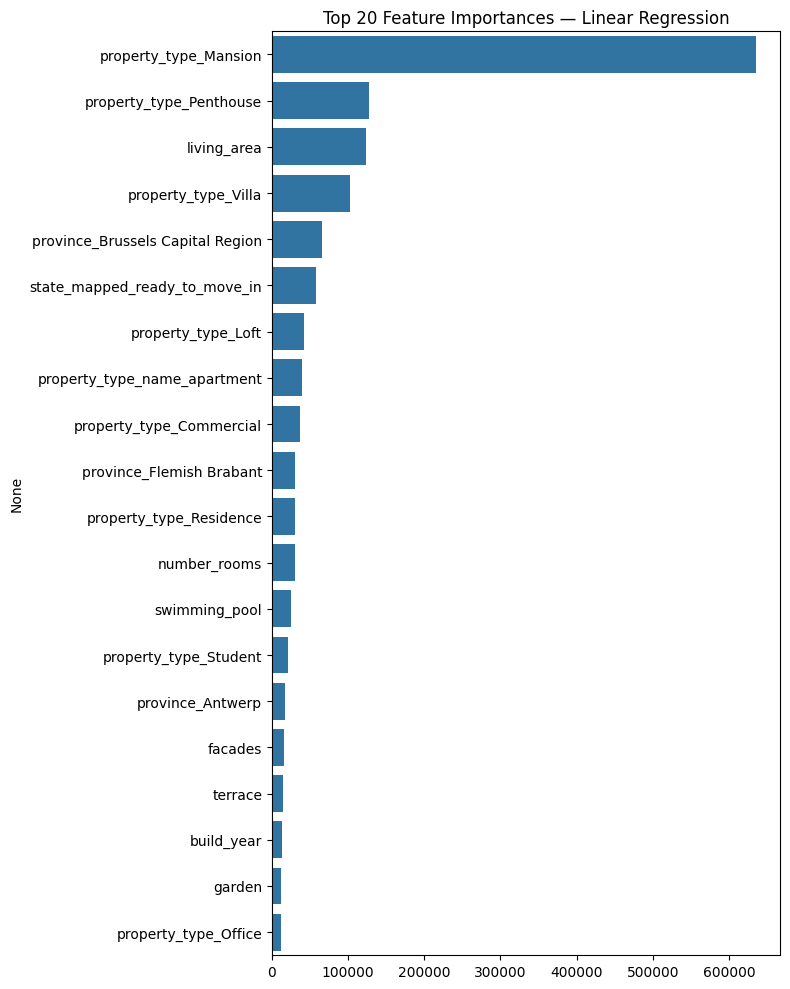

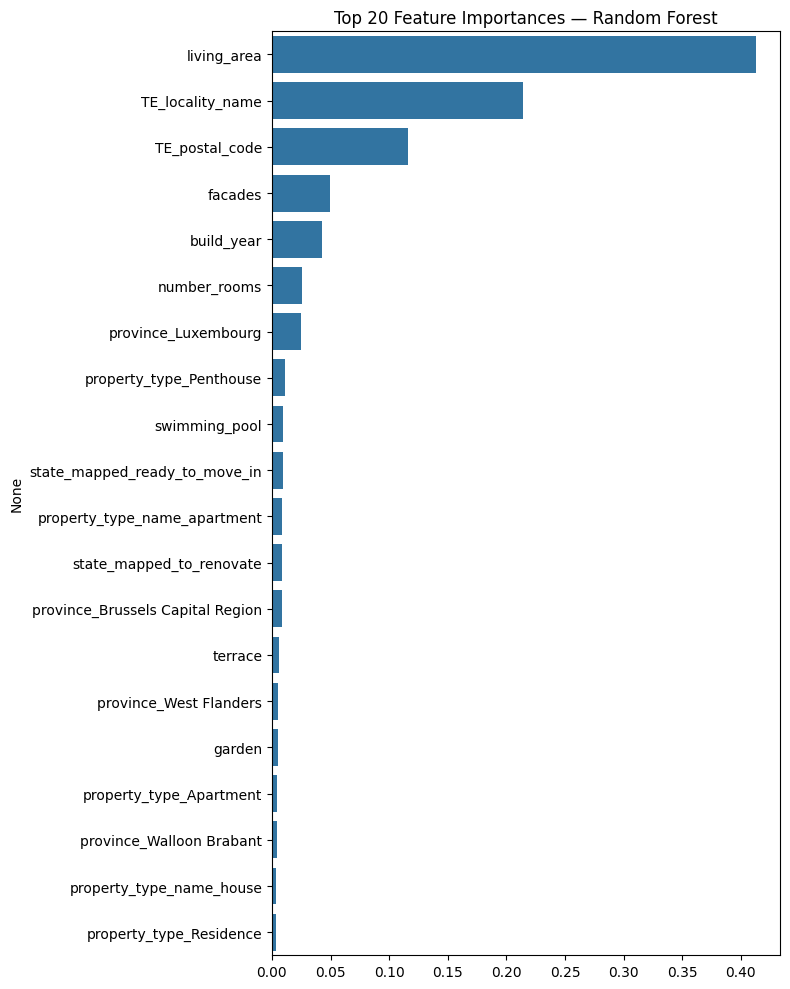

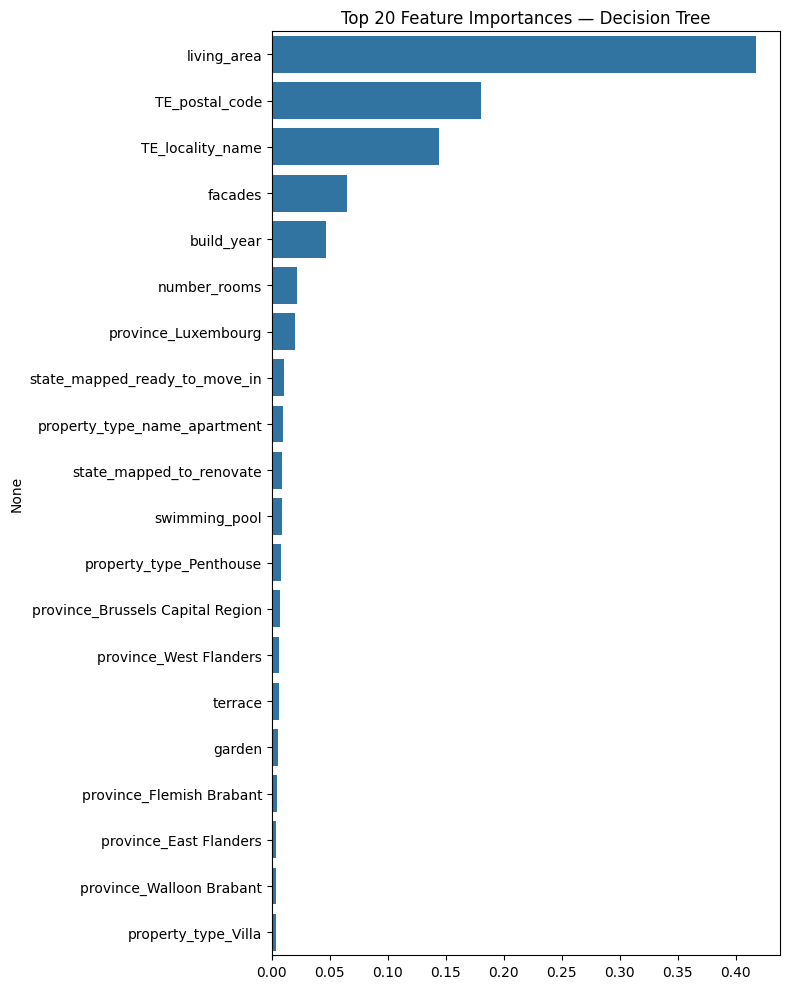

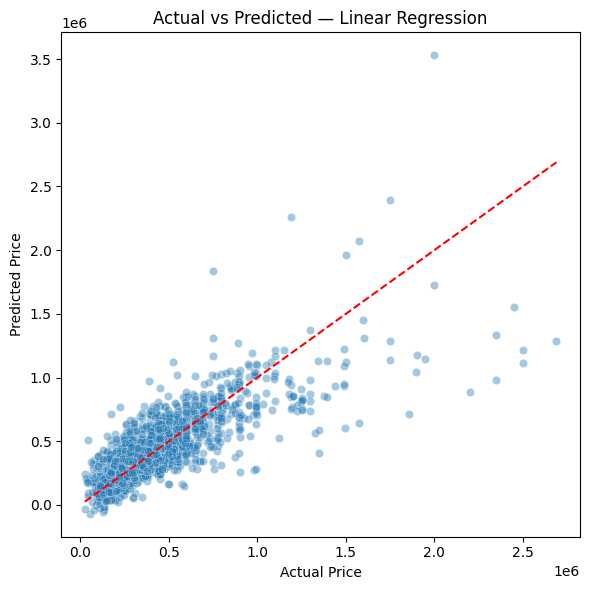

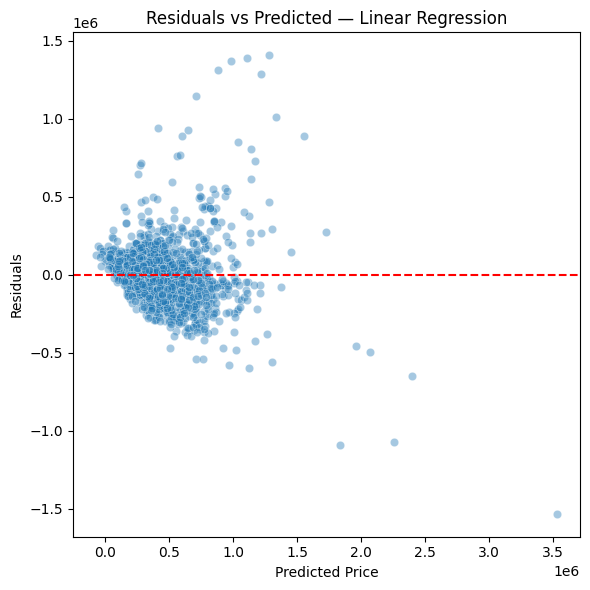

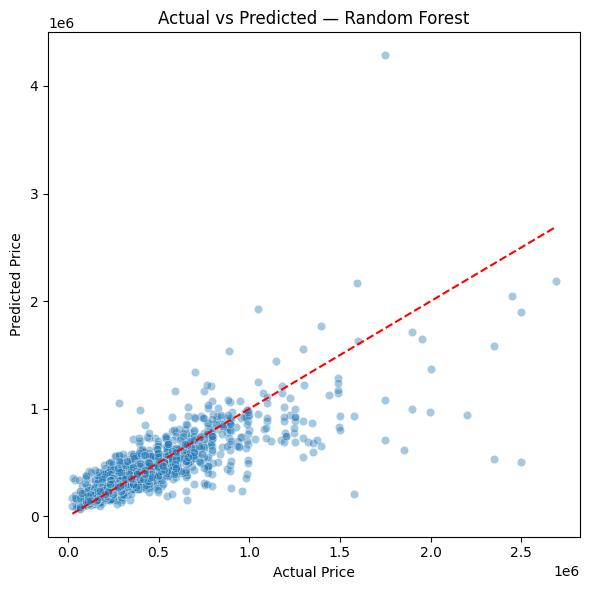

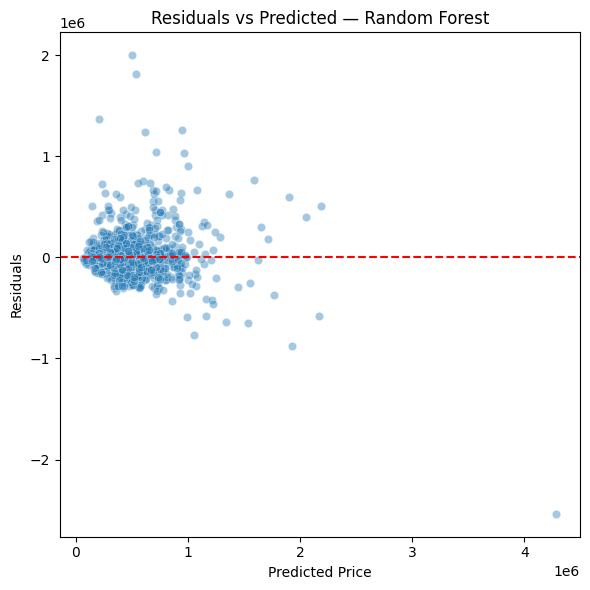

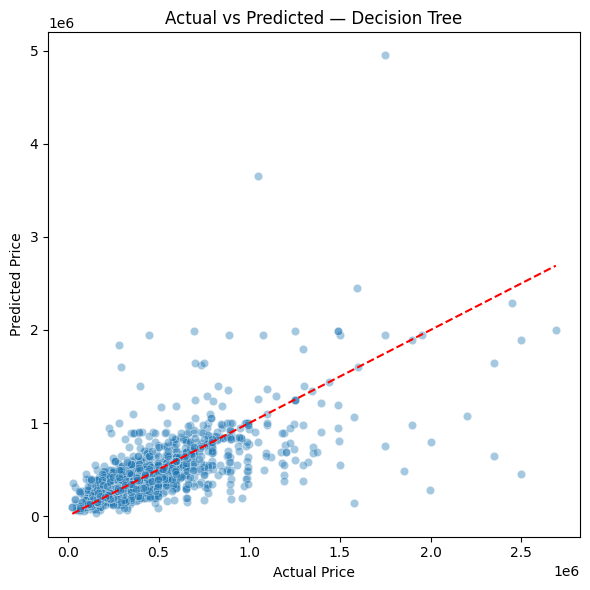

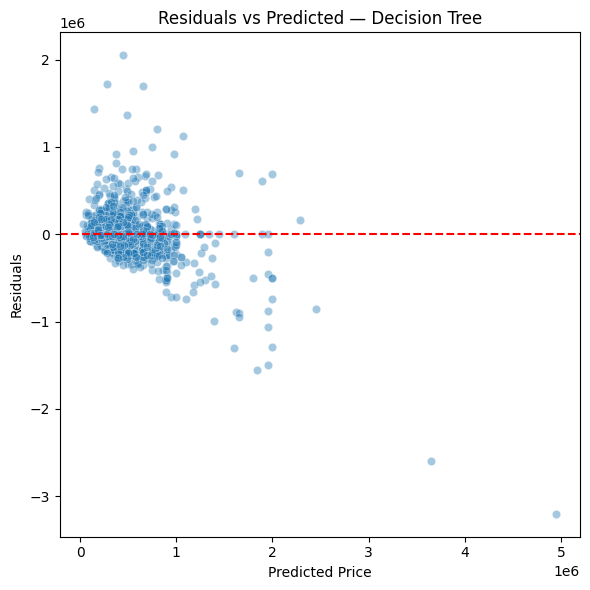

In [83]:
# ============================================================
# COMPARISON UTILITIES (LR, RF, Decision Tree)
# ============================================================


# ============================================================
# 1. PERFORMANCE TABLE FOR TRAIN + TEST (clean ASCII table)
# ============================================================

from tabulate import tabulate

def model_metrics(model, X, y):
    preds = model.predict(X)
    return {
        "MAE": mean_absolute_error(y, preds),
        "RMSE": np.sqrt(mean_squared_error(y, preds)),
        "R2": r2_score(y, preds)
    }

models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model
}

rows = []

for name, model in models.items():
    train = model_metrics(model, X_train, y_train)
    test  = model_metrics(model, X_test,  y_test)

    rows.append([
        name,
        f"{train['MAE']:,.2f}",
        f"{train['RMSE']:,.2f}",
        f"{train['R2']:.4f}",
        f"{test['MAE']:,.2f}",
        f"{test['RMSE']:,.2f}",
        f"{test['R2']:.4f}",
    ])

print("\n===== MODEL PERFORMANCE COMPARISON =====\n")
print(tabulate(
    rows,
    headers=[
        "Model",
        "Train MAE", "Train RMSE", "Train R²",
        "Test MAE", "Test RMSE", "Test R²"
    ],
    tablefmt="grid"
))




# ------------------------------------------------------------
# 2. FEATURE IMPORTANCE / COEFFICIENTS FOR EACH MODEL
# ------------------------------------------------------------

def get_feature_names(pre):
    num_names = numeric_features
    cat_names = pre.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
    te_names  = pre.named_transformers_["te"]["target_encoder"].get_feature_names_out(te_features)
    return np.concatenate([num_names, cat_names, te_names])

feature_names = get_feature_names(preprocessor)


# ---- LR Coefficients ----
lr_coef = lr_model.named_steps["model"].coef_
lr_importances = pd.Series(lr_coef, index=feature_names)



# ---- RF Feature Importances ----
rf_importances = pd.Series(
    rf_model.named_steps["model"].feature_importances_,
    index=feature_names
)



# ---- Decision Tree Feature Importances ----
dt_importances = pd.Series(
    dt_model.named_steps["model"].feature_importances_,
    index=feature_names
)



# ORGANIZE ALL IMPORTANCES
importances_dict = {
    "Linear Regression": lr_importances,
    "Random Forest": rf_importances,
    "Decision Tree": dt_importances
}


# ------------------------------------------------------------
# 3. PLOT FEATURE IMPORTANCES
# ------------------------------------------------------------

def plot_importances(imp, title):
    imp_sorted = imp.sort_values(ascending=False)[:20]
    plt.figure(figsize=(8, 10))
    sns.barplot(x=imp_sorted.values, y=imp_sorted.index)
    plt.title(f"Top 20 Feature Importances — {title}")
    plt.tight_layout()
    plt.show()

for name, imp in importances_dict.items():
    plot_importances(imp, name)



# ------------------------------------------------------------
# 4. ACTUAL vs PREDICTED + RESIDUALS PLOTS
# ------------------------------------------------------------

def plot_actual_vs_pred(model, X, y, title):
    preds = model.predict(X)
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y, y=preds, alpha=0.4)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted — {title}")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
    plt.tight_layout()
    plt.show()

def plot_residuals(model, X, y, title):
    preds = model.predict(X)
    residuals = y - preds
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=preds, y=residuals, alpha=0.4)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted Price")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs Predicted — {title}")
    plt.tight_layout()
    plt.show()


for name, model in models.items():
    plot_actual_vs_pred(model, X_test, y_test, name)
    plot_residuals(model, X_test, y_test, name)


## Cross Validation

## Using log (Target)

In [88]:
# ============================================================
# LOG-PRICE MODELING PIPELINE — LR + RF + CV (ONE BLOCK)
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate


# ============================================================
# 1. CREATE LOG-PRICE TARGET
# ============================================================

df["log_price"] = np.log1p(df["price"])



# ============================================================
# 2. TRAIN/TEST SPLIT (NO LEAKAGE)
# ============================================================

target = "log_price"

X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)



# ============================================================
# 3. MODELS (LOG-PRICE)
# ============================================================

# ---- Linear Regression ----
lr_log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# ---- Random Forest ----
rf_log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        n_jobs=-1,
        random_state=42
    ))
])



# ============================================================
# 4. TRAIN MODELS
# ============================================================

lr_log_model.fit(X_train, y_train)
rf_log_model.fit(X_train, y_train)



# ============================================================
# 5. EVALUATION (REAL € AFTER EXPONENTIAL BACK-TRANSFORM)
# ============================================================

def evaluate_log_model(model, X, y_log, name="Model"):
    y_pred_log = model.predict(X)
    y_true = np.expm1(y_log)
    y_pred = np.expm1(y_pred_log)

    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)

    print(f"\n===== {name} (TEST, REAL €) =====")
    print(f"MAE : {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²  : {r2:.4f}")

    return mae, rmse, r2


print("\n### TEST SET PERFORMANCE (REAL €)")
evaluate_log_model(lr_log_model, X_test, y_test, "Linear Regression (LOG)")
evaluate_log_model(rf_log_model, X_test, y_test, "Random Forest (LOG)")


Train: (11471, 13) Test: (2868, 13)

### TEST SET PERFORMANCE (REAL €)

===== Linear Regression (LOG) (TEST, REAL €) =====
MAE : 109,179.51
RMSE: 916,427.76
R²  : -12.6003

===== Random Forest (LOG) (TEST, REAL €) =====
MAE : 71,243.98
RMSE: 146,822.02
R²  : 0.6509


(71243.98001126994, np.float64(146822.02069739535), 0.6509118339045246)

## XGBoot

In [90]:
# ============================================================
# XGBOOST (RAW PRICE VERSION)
# ============================================================

from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate


# ============================================================
# 1. TRAIN/TEST SPLIT (NO LEAKAGE)
# ============================================================

X = df[feature_cols]
y = df["price"]   # <-- RAW price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)



# ============================================================
# 2. BUILD XGBOOST MODEL (RAW PRICE)
# ============================================================

xgb_raw_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        n_jobs=-1,
        random_state=42
    ))
])



# ============================================================
# 3. TRAIN XGBOOST
# ============================================================

xgb_raw_model.fit(X_train, y_train)

preds_xgb_raw = xgb_raw_model.predict(X_test)



# ============================================================
# 4. EVALUATION (RAW PRICE)
# ============================================================

mae  = mean_absolute_error(y_test, preds_xgb_raw)
rmse = np.sqrt(mean_squared_error(y_test, preds_xgb_raw))
r2   = r2_score(y_test, preds_xgb_raw)

print("\n===== XGBoost (RAW PRICE) TEST PERFORMANCE =====")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²  : {r2:.4f}")



Train: (11471, 13) Test: (2868, 13)

===== XGBoost (RAW PRICE) TEST PERFORMANCE =====
MAE : 68,516.22
RMSE: 132,573.91
R²  : 0.7154


## XGBoot log price

In [89]:
# ============================================================
# XGBOOST REGRESSOR — LOG PRICE VERSION (FULL PIPELINE)
# ============================================================

from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate


# ============================================================
# 1. CREATE LOG-PRICE TARGET (if not already created)
# ============================================================

if "log_price" not in df.columns:
    df["log_price"] = np.log1p(df["price"])



# ============================================================
# 2. TRAIN/TEST SPLIT (NO LEAKAGE)
# ============================================================

target = "log_price"

X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)



# ============================================================
# 3. BUILD XGBOOST MODEL (LOG PRICE)
# ============================================================

xgb_log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        n_jobs=-1,
        random_state=42
    ))
])



# ============================================================
# 4. TRAIN XGBOOST
# ============================================================

xgb_log_model.fit(X_train, y_train)

# Predictions in log-space
log_preds_xgb = xgb_log_model.predict(X_test)

# Back-transform to real prices
preds_xgb = np.expm1(log_preds_xgb)
true_prices = np.expm1(y_test)



# ============================================================
# 5. EVALUATION (REAL €)
# ============================================================

mae_xgb  = mean_absolute_error(true_prices, preds_xgb)
rmse_xgb = np.sqrt(mean_squared_error(true_prices, preds_xgb))
r2_xgb   = r2_score(true_prices, preds_xgb)

print("\n===== XGBoost (LOG → REAL €) TEST PERFORMANCE =====")
print(f"MAE : {mae_xgb:,.2f}")
print(f"RMSE: {rmse_xgb:,.2f}")
print(f"R²  : {r2_xgb:.4f}")



Train: (11471, 13) Test: (2868, 13)

===== XGBoost (LOG → REAL €) TEST PERFORMANCE =====
MAE : 67,454.18
RMSE: 134,976.54
R²  : 0.7050
